Dataset shape: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8      

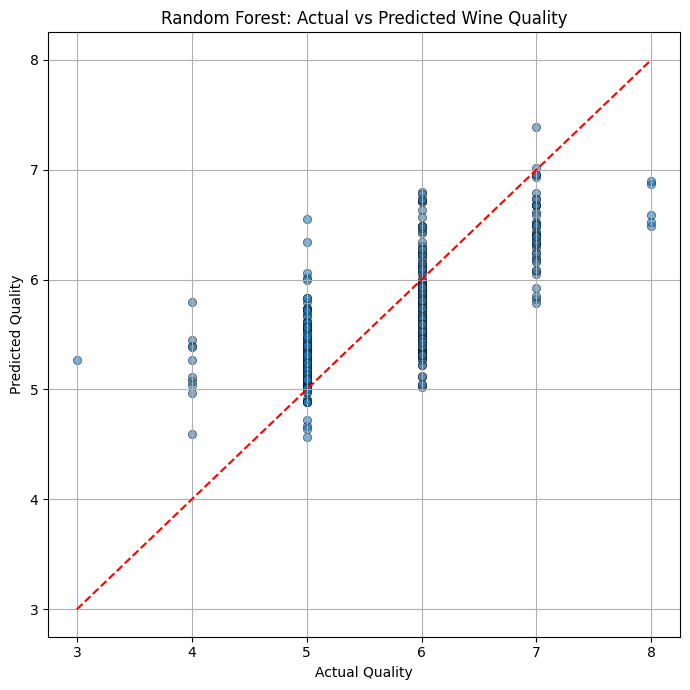

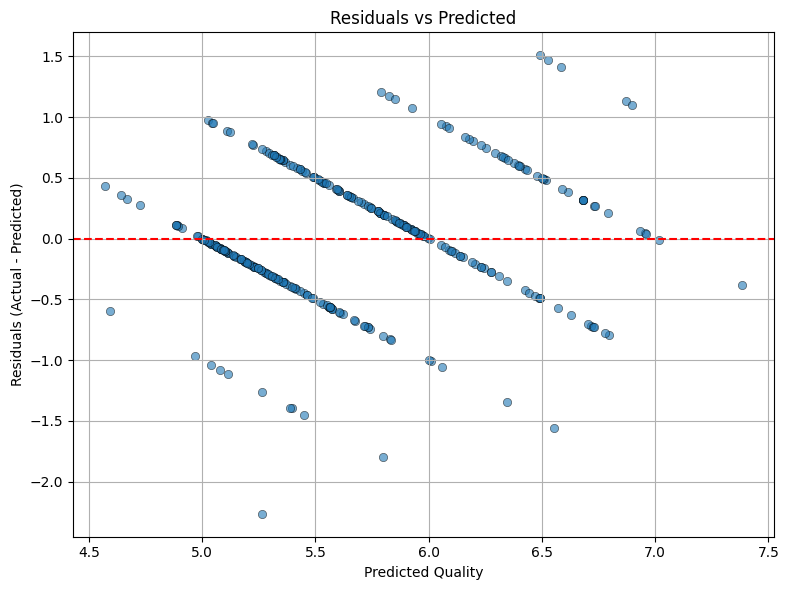

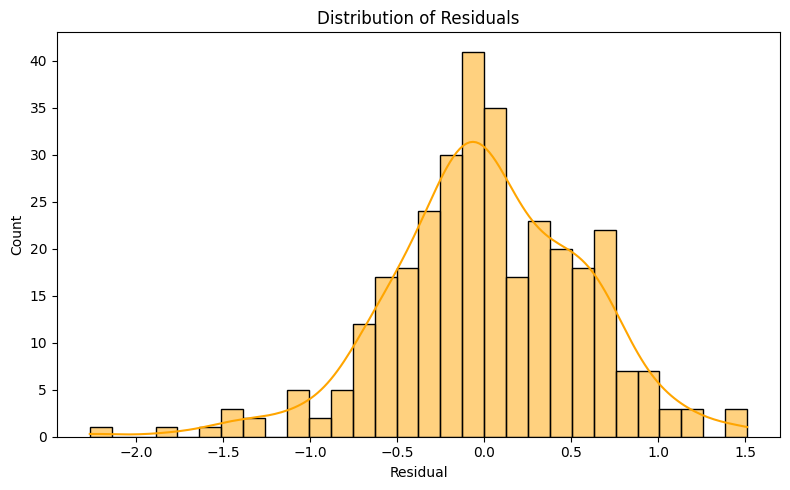

C:\Users\IT SOLUTION\AppData\Local\Temp\ipykernel_16980\250803999.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


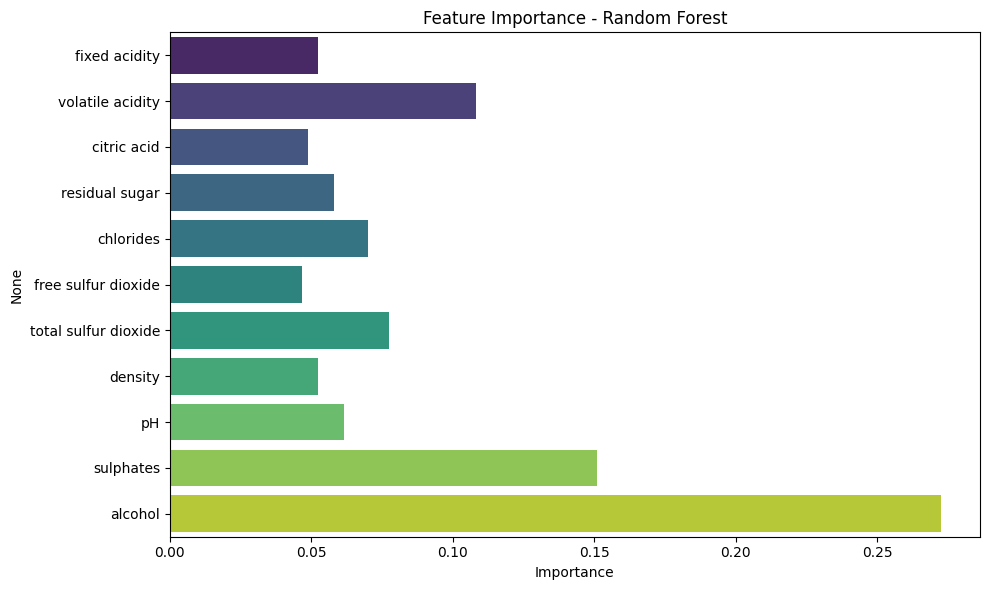

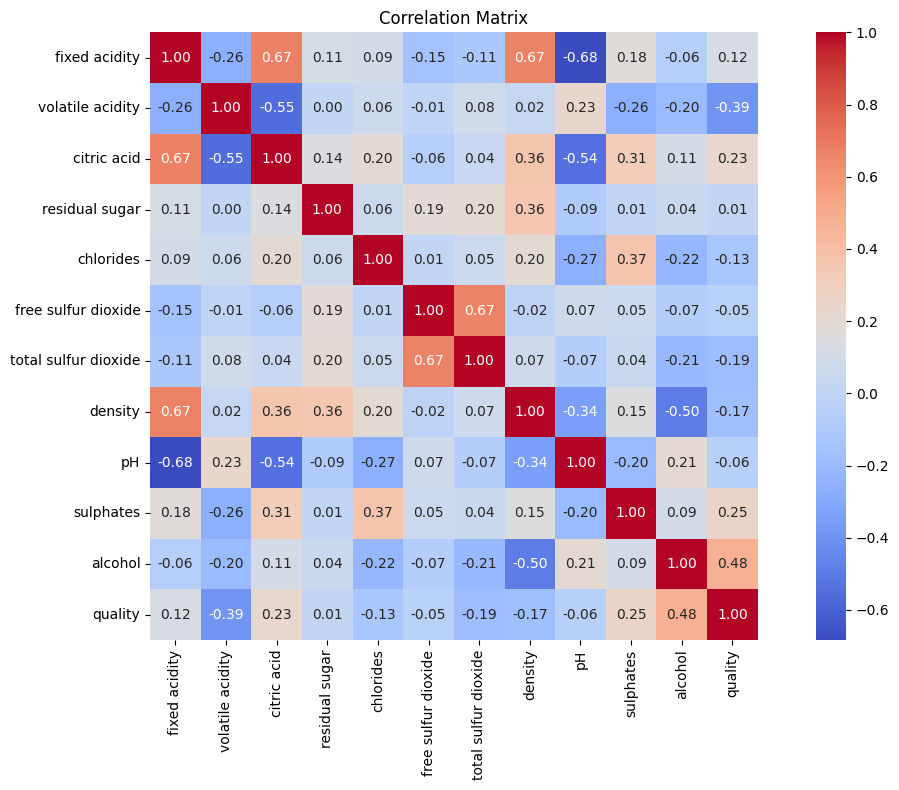

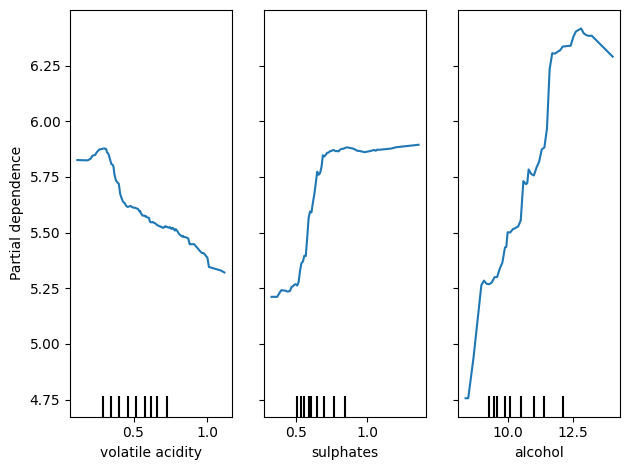

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset 
df = pd.read_csv('winequality-red.csv', sep=';')

print("Dataset shape:", df.shape)
print(df.head())

# Features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest with GridSearchCV
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict on test set
y_pred = best_rf.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R²: {r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest: Actual vs Predicted Wine Quality")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residuals distribution
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()

# Feature Importance 
importances = best_rf.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

#Correlation Heatmap of Features and Target
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Partial Dependence Plots
from sklearn.inspection import PartialDependenceDisplay

top_features = np.argsort(importances)[-3:]  # top 3 features

PartialDependenceDisplay.from_estimator(best_rf, X_test, features=top_features, feature_names=features)
plt.tight_layout()
plt.show()

# Residuals by Actual Quality
residuals_df = pd.DataFrame({'Actual': y_test, 'Residuals': residuals})
plt.figure(figsize=(10,6))
sns.boxplot(x='Actual', y='Residuals', data=residuals_df)
plt.title("Residuals Distribution by Actual Wine Quality")
plt.xlabel("Actual Quality")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

